In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import norm

In [ ]:
df = yf.download("^SPX", progress=False, start="1990-01-01")["Adj Close"].interpolate(method='linear')
returns = np.log(df / df.shift(1)).dropna()

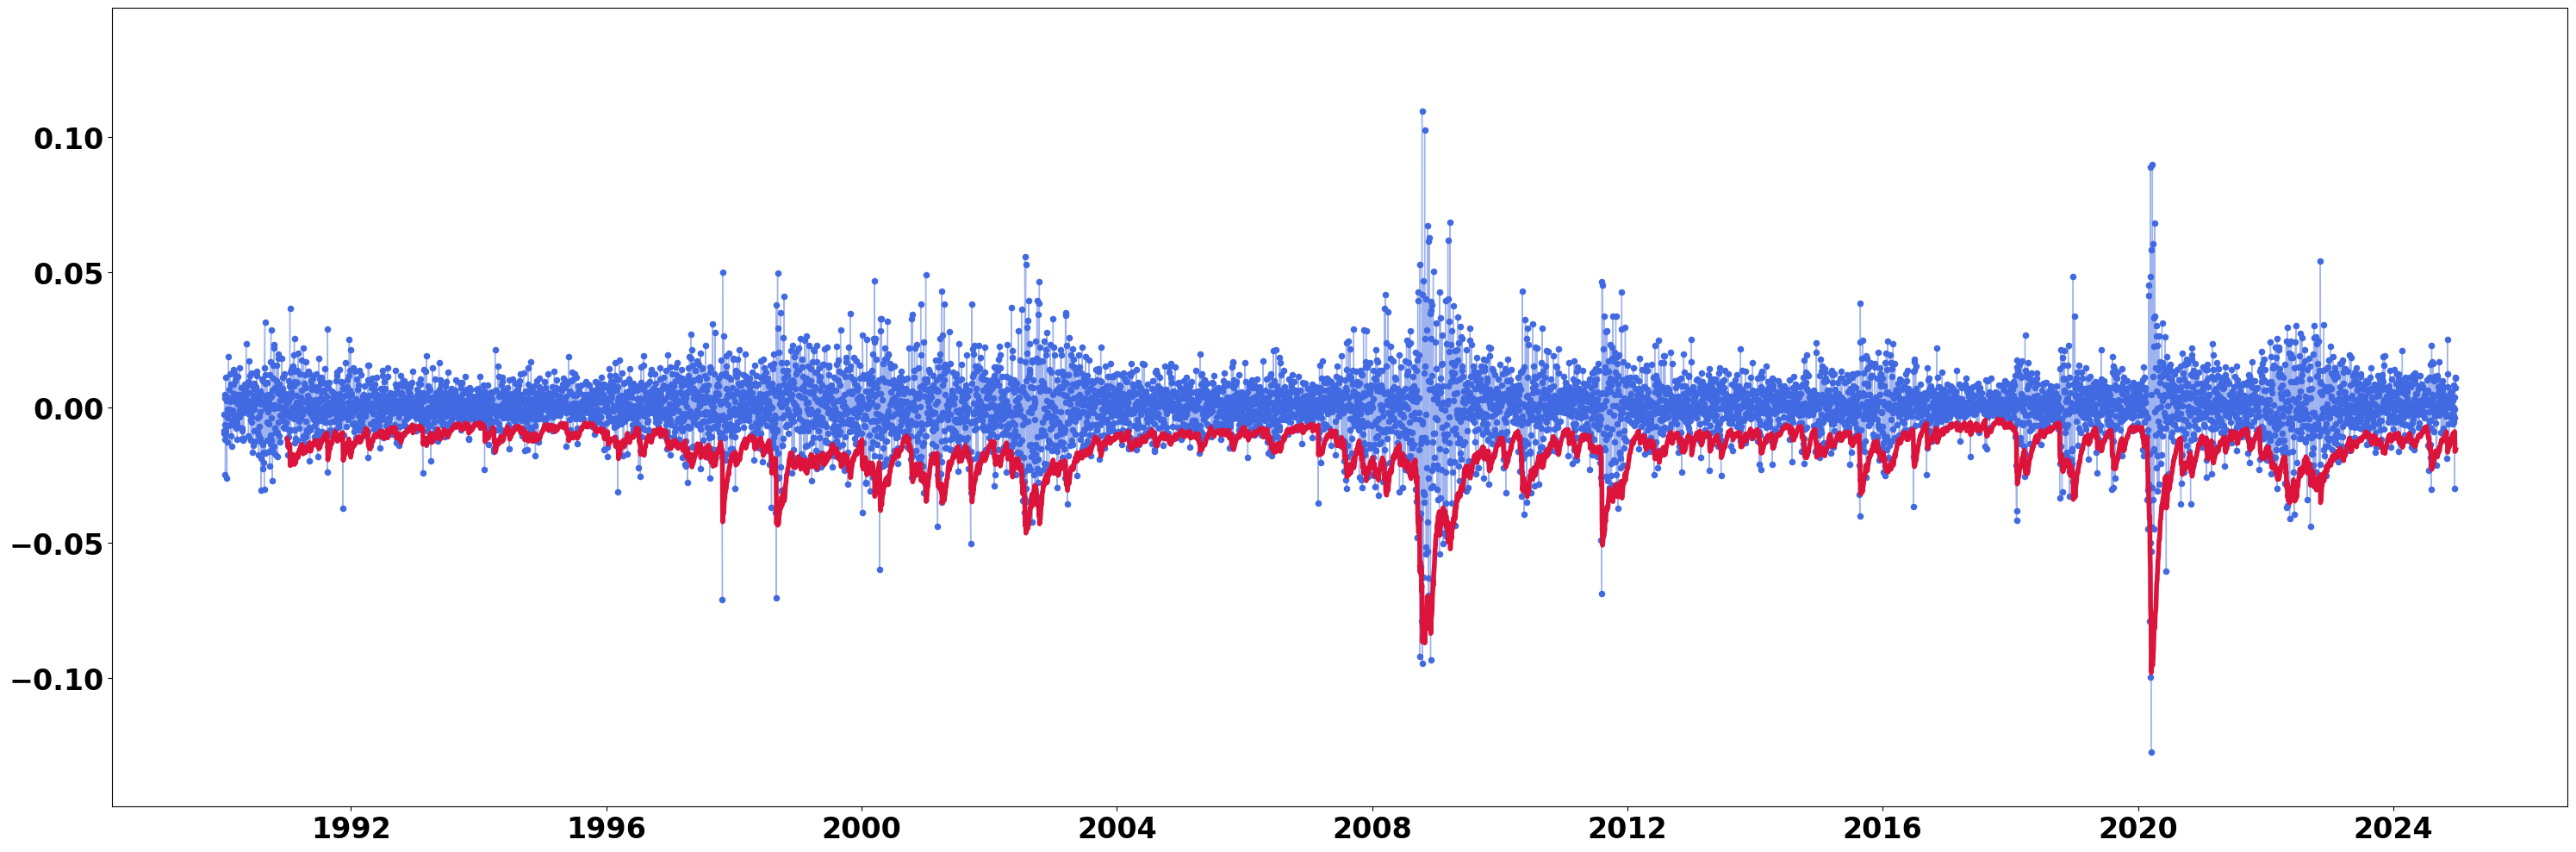

In [135]:
n, h, lam, alpha = len(returns), 252, 0.96, 0.01
sigh = np.zeros(n - h)

for t in range(h, n):
    weights = lam ** np.arange(h - 1, -1, -1)
    returns_w = weights * returns[t - h:t]
    sigh[t - h] = np.sqrt(np.sum(returns_w**2) * (1 - lam))
qf = norm.ppf(alpha)
VaR = qf * sigh

plt.figure(figsize=(30, 10))
plt.scatter(returns.index, returns, color="royalblue", s=20)
plt.plot(returns.index, returns, lw=1, color="royalblue", alpha=0.5)
plt.plot(returns.index[h:], VaR, lw=4, color="crimson")
plt.ylim(-abs(returns).max()-0.02, abs(returns).max()+0.02)
plt.xticks(fontweight='heavy', fontsize=24)
plt.yticks(fontweight='heavy', fontsize=24)
plt.tight_layout()
plt.savefig('VaR.png', dpi=144, transparent=True)
plt.show()